In [5]:
import cv2
import matplotlib.pyplot as plt

In [6]:
config_file = r"C:\Users\pavani\Downloads\ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model = r"C:\Users\pavani\Downloads\frozen_inference_graph.pb"

In [8]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [9]:
classlabels = []
file_name= r"C:\Users\pavani\Downloads\labels.txt"
with open(file_name,'rt') as fpt:
    classlabels = fpt.read().rstrip('\n').split('\n')

In [10]:
len(classlabels)

80

In [12]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 000001A6A6CD4C50>

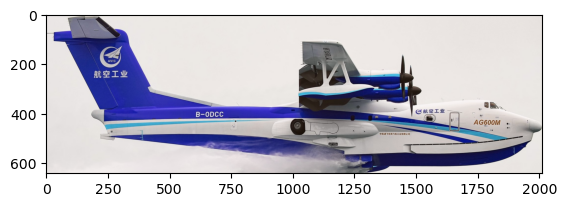

In [30]:
img = cv2.imread(r"C:\Users\pavani\OneDrive\Pictures\new\val\AG600\64dbfffa3f046e8521d80c24bf520884_0.jpg")
plt.imshow(img) # using image

In [31]:
classIndex,confidence,bbox = model.detect(img,confThreshold=0.5)

In [32]:
print(classIndex)

[5]


In [33]:
print(classlabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [34]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for classInd,conf,boxes in zip(classIndex.flatten(),confidence.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classlabels[classInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)

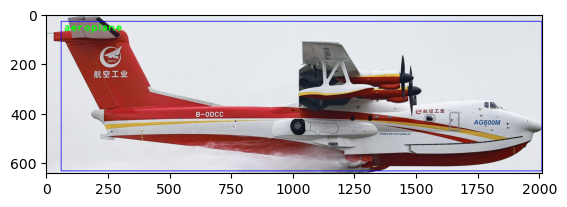

In [35]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [36]:
# VIDEO OBJECT DETECTION

In [40]:
cap = cv2.VideoCapture(r"C:\Users\pavani\OneDrive\Pictures\video (1).mp4")

font_scale=3
font = cv2.FONT_HERSHEY_PLAIN

In [41]:
while True:
    ret,frame = cap.read()
    
    classIndex,confidence,bbox = model.detect(frame,confThreshold=0.55)
    
    print(classIndex)
    
    if(len(classIndex!=0)):
        for classind,conf,boxes in zip(classIndex.flatten(),confidence.flatten(),bbox):
            if(classind<=80):
                cv2.rectangle(img,boxes,(255,0,0),2)
                cv2.putText(img,classlabels[classInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)
    cv2.imshow('objectdset',frame)
    
    if cv2.waitKey(2) & 0xff == ord('q'):
        break
        
        
cap.release()
cv2.destroyallWindows()

[ 1  1  6  8  1  1 10  1]
[ 1  1  8  6  1  1 10  1  1]
[ 1  6  1  8  1 10  1  3  1  1]
[ 1  6  1  1  8 10  1  1]
[ 1  6  1  1  8 10  1  1]
[ 1  6  1  1  8  1 10  1]
[ 1  1  1  6  1 10  1  8  1]
[ 1  1  1  6  3 10  1  8  1  1]
[ 1  1  6  1 10  1  8  1  1]
[ 1  6  1  1  3 10  8  1  1  1]
[ 1  6  1  1  3 10  8  1  1  1]
[ 1  6  1  1  3 10  1  1  1  8]
[ 1  1  1  6  3 10  1  8  1 10]
[ 1  1  6  1  3 10  8  1 10  1]
[ 6  1  1  1  3 10  1  8  3  1]
[ 6  1  1  1  3  1 10  1  8  3 10]
[ 1  6  1  1  3  1  1 10  8  3 10  1]
[ 6  1  1  1  1  1  3  8 10  1 10]
[ 6  1  1  1  1  1  1 10 10  8]
[ 6  1  1  1  1  1  1 10 10  8]
[ 6  1  1  1  1 10  1  1  3  8 10]
[ 1  6  1  1  1  1 10  1  8 10]
[ 1  6  1  1  1 10  1  1  8 10  3]
[ 1  6  1  1  1 10  1  1  8 10  3]
[ 1  6  1  1  1  1  1  8 10 10]
[ 1  6  1  1  8  1  1  1 10 10]
[ 6  1  1  1  1  1 10  8  1 10]
[ 6  1  1  1  1  1  8 10 10  1]
[ 6  1  1  1  1  1  8 10 10]
[ 6  1  1  1  1  1  8 10 10 10]
[ 6  1  1  1  3  1  1  8 10 10  1]
[ 6  1  1  1  8  1  

TypeError: object of type 'bool' has no len()